# Plots for Figure S5

In [1]:
###Load Packages
#Functions for polyA specific analysis (must be in same path)
from polyA_utils import *

#Packages for general column manipulation and statistics
import numpy as np
import pandas as pd
import csv
from tqdm import tqdm
from scipy import stats
import scipy.stats as sci
import pysam
import pybedtools
import gzip as gz

#Packages for plotting
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("white")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Calculate readlengths

In [4]:
#path to data
path = "../../results/"

In [3]:
#Load read data (all reads concat together)
EV_R1 = path + "prinseq/EV.R1_td.fastq.gz"
WT_R1 = path + "prinseq/WT.R1_td.fastq.gz"
S4A_R1 = path + "prinseq/4SA.R1_td.fastq.gz"
S4D_R1 = path + "prinseq/4SD.R1_td.fastq.gz"
EV_R2 = path + "prinseq/EV.R2_td.fastq.gz"
WT_R2 = path + "prinseq/WT.R2_td.fastq.gz"
S4A_R2 = path + "prinseq/4SA.R2_td.fastq.gz"
S4D_R2 = path + "prinseq/4SD.R2_td.fastq.gz"

allreads = path + "prinseq/all_reads.fastq"

In [20]:
#Function to extract read lengths from .fasta files
def getreadlengths(data):
    readlengths = []
    if data.endswith(".gz"):
        with gz.open(data, 'rt') as f:
            for line in tqdm(f):
                if (line[0][0] != 'A') & (line[0][0] != 'G') & (line[0][0] != 'C') & (line[0][0] != 'T'):
                    continue
                readlengths.append(len(line))
        return(readlengths)
    else:
        with open(data, 'rt') as f:
            for line in tqdm(f):
                if (line[0][0] != 'A') & (line[0][0] != 'G') & (line[0][0] != 'C') & (line[0][0] != 'T'):
                    continue
                readlengths.append(len(line))
        return(readlengths)

In [21]:
#all reads
rl = getreadlengths(allreads)
reads = pd.Series(rl)
rl_df = pd.DataFrame(rl)

#EV, R1
rl_EV_1 = getreadlengths(EV_R1)
reads_EV_1 = pd.Series(rl_EV_1)
rl_df_EV_1 = pd.DataFrame(rl_EV_1)
rl_df_EV_1['Replicate'] = 1

#WT, R1
rl_WT_1 = getreadlengths(WT_R1)
reads_WT_1 = pd.Series(rl_WT_1)
rl_df_WT_1 = pd.DataFrame(rl_WT_1)
rl_df_WT_1['Replicate'] = 1

#4SA, R1
rl_4SA_1 = getreadlengths(S4A_R1)
reads_4SA_1 = pd.Series(rl_4SA_1)
rl_df_4SA_1 = pd.DataFrame(rl_4SA_1)
rl_df_4SA_1['Replicate'] = 1

#4SD, R1
rl_4SD_1 = getreadlengths(S4D_R1)
reads_4SD_1 = pd.Series(rl_4SD_1)
rl_df_4SD_1 = pd.DataFrame(rl_4SD_1)
rl_df_4SD_1['Replicate'] = 1

##########
#EV, R2
rl_EV_2 = getreadlengths(EV_R2)
reads_EV_2 = pd.Series(rl_EV_2)
rl_df_EV_2 = pd.DataFrame(rl_EV_2)
rl_df_EV_2['Replicate'] = 2

#WT, R2
rl_WT_2 = getreadlengths(WT_R2)
reads_WT_2 = pd.Series(rl_WT_2)
rl_df_WT_2 = pd.DataFrame(rl_WT_2)
rl_df_WT_2['Replicate'] = 2

#4SA, R2
rl_4SA_2 = getreadlengths(S4A_R2)
reads_4SA_2 = pd.Series(rl_4SA_2)
rl_df_4SA_2 = pd.DataFrame(rl_4SA_2)
rl_df_4SA_2['Replicate'] = 2

#4SD, R2
rl_4SD_2 = getreadlengths(S4D_R2)
reads_4SD_2 = pd.Series(rl_4SD_2)
rl_df_4SD_2 = pd.DataFrame(rl_4SD_2)
rl_df_4SD_2['Replicate'] = 2


11199136it [00:09, 1198448.24it/s]
2866136it [00:07, 378761.31it/s]
1994972it [00:05, 393882.73it/s]
2138876it [00:05, 389702.79it/s]
571596it [00:01, 391547.58it/s]
1353188it [00:03, 353564.63it/s]
686964it [00:01, 353355.61it/s]
1092344it [00:03, 283051.38it/s]
495060it [00:01, 369233.09it/s]


In [22]:
print(" EV_1: " + str(rl_df_EV_1[0].median()) + "\n",
      "EV_2: " + str(rl_df_EV_2[0].median()) + "\n",
      "WT_1: " + str(rl_df_WT_1[0].median()) + "\n",
      "WT_2: " + str(rl_df_WT_2[0].median()) + "\n",
      "4SA_1: " + str(rl_df_4SA_1[0].median()) + "\n",
      "4SA_2: " + str(rl_df_4SA_2[0].median()) + "\n",
      "4SD_1: " + str(rl_df_4SD_1[0].median()) + "\n",
      "4SD_2: " + str(rl_df_4SD_2[0].median()),
     )

 EV_1: 908.0
 EV_2: 1046.0
 WT_1: 875.0
 WT_2: 970.0
 4SA_1: 894.0
 4SA_2: 1024.0
 4SD_1: 883.0
 4SD_2: 990.0


In [23]:
allreads_l = getreadlengths(allreads)
reads_all_l = pd.Series(allreads_l)
rl_df = pd.DataFrame(reads_all_l)

11199136it [00:09, 1141195.18it/s]


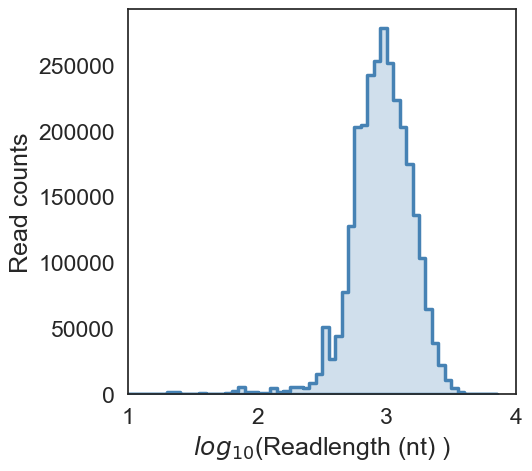

In [24]:
#Plot the readlength distribution of all reads together
fig, (ax1) = plt.subplots(1,1, figsize = (5, 5))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

sns.histplot(data = np.log10(rl_df), binwidth = 0.05, element="step", ax = ax1, legend = False, lw=2.5, palette=['steelblue'])
ax1.set_xlim(1,4)
ax1.set_xlabel('$log_{10}$(Readlength (nt) )')
ax1.set_ylabel('Read counts')

plt.show()

In [25]:
#General read info - min, max, median
print(
    "Minimum readlength: " + str(rl_df.min()[0]) + "\n" +
    "Maximum readlength: " + str(rl_df.max()[0]) + "\n" +
    "Median readdlength: " + str(rl_df.median()[0]) + "\n")

Minimum readlength: 2
Maximum readlength: 6457
Median readdlength: 934.0



## Calculate gene coverage

In [26]:
# Define a function to get a dataframe of coverage for each gene
def get_gene_cov(file, gene, condition):
    data_bedtool = pybedtools.BedTool(file)
    genes_bedtool = pybedtools.BedTool(genes)
    
    df = genes_bedtool.coverage(data_bedtool).to_dataframe(names = ['chr', 'start', 'end', 'name', 'score', 'strand', 'nReadsPerGene', 'nBasesPerGeneCovered', 'geneLength', 'fracBasesPerGeneCovered']) # column 6 is coverage count - how many reads from the data file overlap at each region (gene) in the genes file
    df['sample'] = condition
    
    return df

In [27]:
genes = "../../config/only_genes.bed"

In [29]:
h112_R1_cov = get_gene_cov(path + "mapping/EV.R1_hg38.bed", genes, "EV")
h112_R2_cov = get_gene_cov(path + "mapping/EV.R1_hg38.bed", genes, "EV")
h113_R1_cov = get_gene_cov(path + "mapping/WT.R1_hg38.bed", genes, "WT")
h113_R2_cov = get_gene_cov(path + "mapping/WT.R1_hg38.bed", genes, "WT")
h115_R1_cov = get_gene_cov(path + "mapping/4SA.R1_hg38.bed", genes, "4SA")
h115_R2_cov = get_gene_cov(path + "mapping/4SA.R1_hg38.bed", genes, "4SA")
h117_R1_cov = get_gene_cov(path + "mapping/4SD.R1_hg38.bed", genes, "4SD")
h117_R2_cov = get_gene_cov(path + "mapping/4SD.R1_hg38.bed", genes, "4SD")

***** WARNING: File ../../results/mapping/EV.R1_hg38.bed has inconsistent naming convention for record:
GL000009.2	34651	36797	m64146_210430_195255/18284941/ccs	16	-	34651	36797	255,0,0	1	2146	0

***** WARNING: File ../../results/mapping/EV.R1_hg38.bed has inconsistent naming convention for record:
GL000009.2	34651	36797	m64146_210430_195255/18284941/ccs	16	-	34651	36797	255,0,0	1	2146	0

***** WARNING: File ../../results/mapping/EV.R1_hg38.bed has inconsistent naming convention for record:
GL000009.2	34651	36797	m64146_210430_195255/18284941/ccs	16	-	34651	36797	255,0,0	1	2146	0

***** WARNING: File ../../results/mapping/EV.R1_hg38.bed has inconsistent naming convention for record:
GL000009.2	34651	36797	m64146_210430_195255/18284941/ccs	16	-	34651	36797	255,0,0	1	2146	0

***** WARNING: File ../../results/mapping/WT.R1_hg38.bed has inconsistent naming convention for record:
GL000009.2	20590	21107	m64146_210430_195255/132056444/ccs	0	-	20590	21107	255,0,0	1	517	0

***** WARNING: File .

In [30]:
all_cov = pd.concat([h112_R1_cov,
                     h112_R2_cov,
                     h113_R1_cov,
                     h113_R2_cov,
                     h115_R1_cov,
                     h115_R2_cov,
                     h117_R1_cov,
                     h117_R2_cov])

In [153]:
#Print number of genes with at least 100 reads per gene (all conditions/replicates combined)
len(all_cov.loc[all_cov.nReadsPerGene >= 100])

9592

/var/folders/y_/x9kz6ckx4gx2pm_d26qfgy2w0000gn/T/ipykernel_34049/3132620305.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_cov_grouped = all_cov.groupby("name").sum()


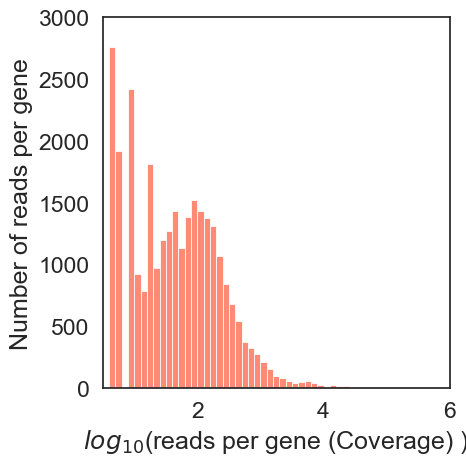

In [132]:
 all_cov_grouped = all_cov.groupby("name").sum()

f, ax = plt.subplots(1,1, figsize = (5,5))
sns.histplot(x = np.log10(all_cov_grouped.loc[all_cov_grouped["nReadsPerGene"] >= 1]["nReadsPerGene"]), color = "tomato", binwidth = 0.1)
ax.set_xlabel("$log_{10}$(reads per gene (Coverage) )")
ax.set_ylabel("Number of reads per gene")

ax.set_xlim(0.5,6)
ax.set_ylim(0,3000)
f.tight_layout()
plt.show()

## Plot poly(A) tail lengths between replicates and conditions

In [38]:
#Function to read polyA tab del files
def read_polyA_reads(file, min_read_count, sample_name, replicate):
    df = pd.read_csv(file, delimiter='\t')
    df = df.loc[df['tail_len'] >= min_read_count]
    df['Sample'] = sample_name
    df['Replicate'] = replicate
    return(df)

Set master path that points to the experiment directory

In [39]:
#path to the experiment
path = "../../"

In [40]:
#Read in dfs, assign to variables
min_A_count = 10

h112_1 = read_polyA_reads(path + 'results/polyA_len/EV.R1_polyA.txt', min_A_count, "EV", "1")
h112_2 = read_polyA_reads(path + 'results/polyA_len/EV.R2_polyA.txt', min_A_count, "EV", "2")

h113_1 = read_polyA_reads(path + 'results/polyA_len/WT.R1_polyA.txt', min_A_count, "WT", "1")
h113_2 = read_polyA_reads(path + 'results/polyA_len/WT.R2_polyA.txt', min_A_count, "WT", "2")

h115_1 = read_polyA_reads(path + 'results/polyA_len/4SA.R1_polyA.txt', min_A_count, "4SA", "1")
h115_2 = read_polyA_reads(path + 'results/polyA_len/4SA.R2_polyA.txt', min_A_count, "4SA", "2")

h117_1 = read_polyA_reads(path + 'results/polyA_len/4SD.R1_polyA.txt', min_A_count, "4SD", "1")
h117_2 = read_polyA_reads(path + 'results/polyA_len/4SD.R2_polyA.txt', min_A_count, "4SD", "2")

#Path to gene types df (from gtf)
gene_types = pd.read_csv(path + "config/gene_types_df.tsv", sep = "\t")

#Combine replicates and intersect with gene names
all_reads = pd.concat([h112_1, h112_2, h113_1, h113_2, h115_1, h115_2, h117_1, h117_2], ignore_index = True)
all_reads["gene_id"] = all_reads["gene_id"].str.split(".").str[0]
all_reads = all_reads.merge(gene_types, on = 'gene_id')

Percentage of reads that are polyadenylated:

In [41]:
#Caclulate the total number of reads (from wc -l on mapped bed files)
tot_reads = 3540316 #from (wc -l)/4 of all_reads.fastq
print("number of genome mapped reads with poly(A) tails: " + str(len(all_reads)))
print("percentage of mapped reads with poly(A) tails: " + str(len(all_reads)/tot_reads * 100))

number of genome mapped reads with poly(A) tails: 2091774
percentage of mapped reads with poly(A) tails: 59.08438681744793


#### Compare polyA tail lengths for all reads between conditions

Compare replicates between conditions

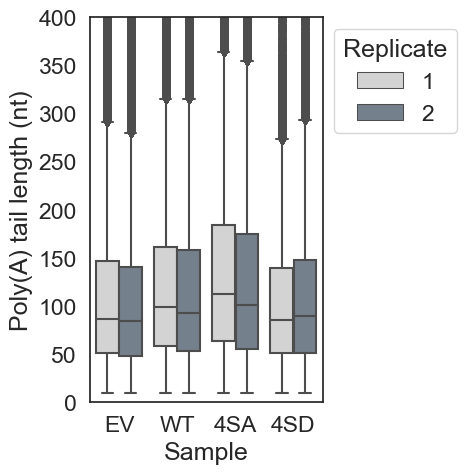

In [42]:
f, ax = plt.subplots(1,1, figsize = (3,5))
sns.boxplot(data = all_reads, x = "Sample", y = "tail_len", palette = ["lightgrey", "slategrey"], hue = "Replicate")

ax.set_ylim(0,400)
ax.set_ylabel("Poly(A) tail length (nt)")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

## Calculate positional non-A base usage with reads aligned at cleavage site

In [43]:
#trange defines the number of bases to consider in the tail alignment
trange = 400

total_c_h112_1, tail_len_h112_1, base_count_prox_h112_1, base_count_dist_h112_1, base_cov_h112_1 = nonA(path + 'results/mapping/EV.R1_hg38.bam', tail_range = trange)
total_c_h113_1, tail_len_h113_1, base_count_prox_h113_1, base_count_dist_h113_1, base_cov_h113_1 = nonA(path + 'results/mapping/WT.R1_hg38.bam', tail_range = trange)
total_c_h115_1, tail_len_h115_1, base_count_prox_h115_1, base_count_dist_h115_1, base_cov_h115_1 = nonA(path + 'results/mapping/4SA.R1_hg38.bam', tail_range = trange)
total_c_h117_1, tail_len_h117_1, base_count_prox_h117_1, base_count_dist_h117_1, base_cov_h117_1 = nonA(path + 'results/mapping/4SD.R1_hg38.bam', tail_range = trange)

total_c_h112_2, tail_len_h112_2, base_count_prox_h112_2, base_count_dist_h112_2, base_cov_h112_2 = nonA(path + 'results/mapping/EV.R2_hg38.bam', tail_range = trange)
total_c_h113_2, tail_len_h113_2, base_count_prox_h113_2, base_count_dist_h113_2, base_cov_h113_2 = nonA(path + 'results/mapping/WT.R2_hg38.bam', tail_range = trange)
total_c_h115_2, tail_len_h115_2, base_count_prox_h115_2, base_count_dist_h115_2, base_cov_h115_2 = nonA(path + 'results/mapping/4SA.R2_hg38.bam', tail_range = trange)
total_c_h117_2, tail_len_h117_2, base_count_prox_h117_2, base_count_dist_h117_2, base_cov_h117_2 = nonA(path + 'results/mapping/h117.R2_hg38.bam', tail_range = trange)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121037/121037 [00:46<00:00, 2623.43it/s]


In [44]:
#Function to bin nucleotide percentages per position
def bin_array(mut, cov, binsize, **kwargs):
    # reactivity calculation in discrete bins of polymerase positions
    assert len(mut) == len(cov)

    bins = np.arange(0, len(mut), binsize)
    mut_bin = np.zeros(len(bins))
    cov_bin = np.zeros(len(bins))

    for i in range(len(bins)):
        if i < len(bins)-1:
            cov_bin[i] = np.sum(cov[bins[i]:bins[i+1]])
            mut_bin[i] = np.sum(mut[bins[i]:bins[i+1]])

        else: # last bin in case it doesn't add up
            cov_bin[i] = np.sum(cov[bins[i]:])
            mut_bin[i] = np.sum(mut[bins[i]:])
            
    return(bins, mut_bin, cov_bin)

In [102]:
#EV
bins = 5
base_count_prox_a_h112_1_bins = bin_array(base_count_prox_h112_1[0], base_cov_h112_1, bins)
base_count_prox_a_h112_2_bins = bin_array(base_count_prox_h112_2[0], base_cov_h112_2, bins)

base_count_prox_g_h112_1_bins = bin_array(base_count_prox_h112_1[1], base_cov_h112_1, bins)
base_count_prox_g_h112_2_bins = bin_array(base_count_prox_h112_2[1], base_cov_h112_2, bins)

base_count_prox_u_h112_1_bins = bin_array(base_count_prox_h112_1[2], base_cov_h112_1, bins)
base_count_prox_u_h112_2_bins = bin_array(base_count_prox_h112_2[2], base_cov_h112_2, bins)

base_count_prox_c_h112_1_bins = bin_array(base_count_prox_h112_1[3], base_cov_h112_1, bins)
base_count_prox_c_h112_2_bins = bin_array(base_count_prox_h112_2[3], base_cov_h112_2, bins)

In [103]:
#WT
bins = 5
base_count_prox_a_h113_1_bins = bin_array(base_count_prox_h113_1[0], base_cov_h113_1, bins)
base_count_prox_a_h113_2_bins = bin_array(base_count_prox_h113_2[0], base_cov_h113_2, bins)

base_count_prox_g_h113_1_bins = bin_array(base_count_prox_h113_1[1], base_cov_h113_1, bins)
base_count_prox_g_h113_2_bins = bin_array(base_count_prox_h113_2[1], base_cov_h113_2, bins)

base_count_prox_u_h113_1_bins = bin_array(base_count_prox_h113_1[2], base_cov_h113_1, bins)
base_count_prox_u_h113_2_bins = bin_array(base_count_prox_h113_2[2], base_cov_h113_2, bins)

base_count_prox_c_h113_1_bins = bin_array(base_count_prox_h113_1[3], base_cov_h113_1, bins)
base_count_prox_c_h113_2_bins = bin_array(base_count_prox_h113_2[3], base_cov_h113_2, bins)

In [104]:
#4SA
bins = 5
base_count_prox_a_h115_1_bins = bin_array(base_count_prox_h115_1[0], base_cov_h115_1, bins)
base_count_prox_a_h115_2_bins = bin_array(base_count_prox_h115_2[0], base_cov_h115_2, bins)

base_count_prox_g_h115_1_bins = bin_array(base_count_prox_h115_1[1], base_cov_h115_1, bins)
base_count_prox_g_h115_2_bins = bin_array(base_count_prox_h115_2[1], base_cov_h115_2, bins)

base_count_prox_u_h115_1_bins = bin_array(base_count_prox_h115_1[2], base_cov_h115_1, bins)
base_count_prox_u_h115_2_bins = bin_array(base_count_prox_h115_2[2], base_cov_h115_2, bins)

base_count_prox_c_h115_1_bins = bin_array(base_count_prox_h115_1[3], base_cov_h115_1, bins)
base_count_prox_c_h115_2_bins = bin_array(base_count_prox_h115_2[3], base_cov_h115_2, bins)

In [105]:
#4SD
bins = 5
base_count_prox_a_h117_1_bins = bin_array(base_count_prox_h117_1[0], base_cov_h117_1, bins)
base_count_prox_a_h117_2_bins = bin_array(base_count_prox_h117_2[0], base_cov_h117_2, bins)

base_count_prox_g_h117_1_bins = bin_array(base_count_prox_h117_1[1], base_cov_h117_1, bins)
base_count_prox_g_h117_2_bins = bin_array(base_count_prox_h117_2[1], base_cov_h117_2, bins)

base_count_prox_u_h117_1_bins = bin_array(base_count_prox_h117_1[2], base_cov_h117_1, bins)
base_count_prox_u_h117_2_bins = bin_array(base_count_prox_h117_2[2], base_cov_h117_2, bins)

base_count_prox_c_h117_1_bins = bin_array(base_count_prox_h117_1[3], base_cov_h117_1, bins)
base_count_prox_c_h117_2_bins = bin_array(base_count_prox_h117_2[3], base_cov_h117_2, bins)

#### Generate figures to compare nonA use between conditions

Compare C usage - stats for 4SA vs 4SD

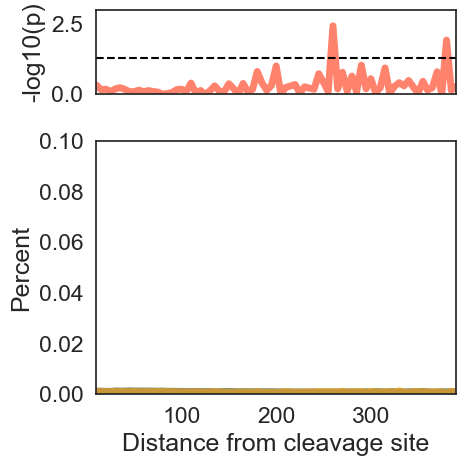

In [111]:
#Run t-test between percent nt ussage at each postion
stat_vals_5 = stats.ttest_ind(
                            [base_count_prox_c_h115_1_bins[1]/(base_count_prox_c_h115_1_bins[2] + base_count_prox_c_h115_1_bins[1]), base_count_prox_c_h115_2_bins[1]/(base_count_prox_c_h115_2_bins[2] + base_count_prox_c_h115_2_bins[1])],
                            [base_count_prox_c_h117_1_bins[1]/(base_count_prox_c_h117_1_bins[2] + base_count_prox_c_h117_1_bins[1]), base_count_prox_c_h117_2_bins[1]/(base_count_prox_c_h117_2_bins[2] + (base_count_prox_c_h117_2_bins[1]))])[-1]

#############################################################

#Figure for percent nt - 5' end A
#Generate plot
fig, (ax2, axs) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 3]}, figsize=(5, 5))

###############################################
#proximal
sns.lineplot(x = (base_count_prox_c_h112_1_bins[0] + base_count_prox_c_h112_2_bins[0])/2, 
             y=(base_count_prox_c_h112_1_bins[1]/(base_count_prox_c_h112_1_bins[2] + base_count_prox_c_h112_1_bins[1])) + 
               (base_count_prox_c_h112_2_bins[1]/(base_count_prox_c_h112_2_bins[2] + base_count_prox_c_h112_2_bins[1]))/2, 
                alpha=.6, color = 'darkgreen', ax = axs, linewidth = 5)


sns.lineplot(x = (base_count_prox_c_h113_1_bins[0] + base_count_prox_c_h113_2_bins[0])/2, 
             y=(base_count_prox_c_h113_1_bins[1]/(base_count_prox_c_h113_1_bins[2] + base_count_prox_c_h113_1_bins[1])) + 
               (base_count_prox_c_h113_2_bins[1]/(base_count_prox_c_h113_2_bins[2] + base_count_prox_c_h113_2_bins[1]))/2, 
                alpha=.6, color = 'tomato', ax = axs, linewidth = 5)

sns.lineplot(x = (base_count_prox_c_h115_1_bins[0] + base_count_prox_c_h115_2_bins[0])/2, 
             y=(base_count_prox_c_h115_1_bins[1]/(base_count_prox_c_h115_1_bins[2] + base_count_prox_c_h115_1_bins[1])) + 
               (base_count_prox_c_h115_2_bins[1]/(base_count_prox_c_h115_2_bins[2] + base_count_prox_c_h115_2_bins[1]))/2, 
                alpha=.6, color = 'steelblue', ax = axs, linewidth = 5)

sns.lineplot(x = (base_count_prox_c_h117_1_bins[0] + base_count_prox_c_h117_2_bins[0])/2, 
             y=(base_count_prox_c_h117_1_bins[1]/(base_count_prox_c_h117_1_bins[2] + base_count_prox_c_h117_1_bins[1])) + 
               (base_count_prox_c_h117_2_bins[1]/(base_count_prox_c_h117_2_bins[2] + base_count_prox_c_h117_2_bins[1]))/2, 
                alpha=.6, color = 'orange', ax = axs, linewidth = 5)


ax2 = sns.lineplot(x = (base_count_prox_c_h115_1_bins[0] + base_count_prox_c_h115_2_bins[0])/2, 
                   y = -np.log10(stat_vals_5), 
                   alpha=.8, color = 'tomato', ax = ax2, linewidth = 5)

ax2.set_ylabel("-log10(p)")
ax2.axhline(-np.log10(0.05), linestyle = '--', color = 'black')

axs.set_xlim(10, 390)
ax2.set_xlim(10, 390)
ax2.set(xticklabels=[])  # remove the tick labels
ax2.tick_params(bottom=False)  # remove the ticks

axs.set_ylim(0, 0.1)
ax2.set_ylim(0,3)

axs.set_ylabel("Percent")
axs.set_xlabel("Distance from cleavage site")


fig.tight_layout()

plt.show()

Compare G usage - stats for 4SA vs 4SD

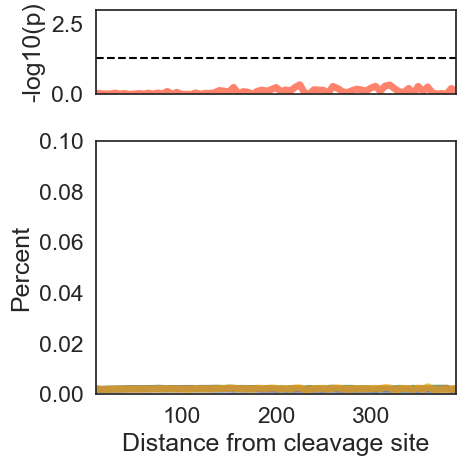

In [112]:
#Run t-test between percent nt ussage at each postion
stat_vals_5 = stats.ttest_ind(
                            [base_count_prox_g_h115_1_bins[1]/(base_count_prox_g_h115_1_bins[2] + base_count_prox_g_h115_1_bins[1]), base_count_prox_g_h115_2_bins[1]/(base_count_prox_g_h115_2_bins[2] + base_count_prox_g_h115_2_bins[1])],
                            [base_count_prox_g_h117_1_bins[1]/(base_count_prox_g_h117_1_bins[2] + base_count_prox_g_h117_1_bins[1]), base_count_prox_g_h117_2_bins[1]/(base_count_prox_g_h117_2_bins[2] + (base_count_prox_g_h117_2_bins[1]))])[-1]


#############################################################

#Figure for percent nt - 5' end A
#Generate plot
fig, (ax2, axs) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 3]}, figsize=(5, 5))

###############################################
#proximal
sns.lineplot(x = (base_count_prox_g_h112_1_bins[0] + base_count_prox_g_h112_2_bins[0])/2, 
             y=(base_count_prox_g_h112_1_bins[1]/(base_count_prox_g_h112_1_bins[2] + base_count_prox_g_h112_1_bins[1])) + 
               (base_count_prox_g_h112_2_bins[1]/(base_count_prox_g_h112_2_bins[2] + base_count_prox_g_h112_2_bins[1]))/2, 
                alpha=.6, color = 'darkgreen', ax = axs, linewidth = 5)


sns.lineplot(x = (base_count_prox_g_h113_1_bins[0] + base_count_prox_g_h113_2_bins[0])/2, 
             y=(base_count_prox_g_h113_1_bins[1]/(base_count_prox_g_h113_1_bins[2] + base_count_prox_g_h113_1_bins[1])) + 
               (base_count_prox_g_h113_2_bins[1]/(base_count_prox_g_h113_2_bins[2] + base_count_prox_g_h113_2_bins[1]))/2, 
                alpha=.6, color = 'tomato', ax = axs, linewidth = 5)

sns.lineplot(x = (base_count_prox_g_h115_1_bins[0] + base_count_prox_g_h115_2_bins[0])/2, 
             y=(base_count_prox_g_h115_1_bins[1]/(base_count_prox_g_h115_1_bins[2] + base_count_prox_g_h115_1_bins[1])) + 
               (base_count_prox_g_h115_2_bins[1]/(base_count_prox_g_h115_2_bins[2] + base_count_prox_g_h115_2_bins[1]))/2, 
                alpha=.6, color = 'steelblue', ax = axs, linewidth = 5)

sns.lineplot(x = (base_count_prox_g_h117_1_bins[0] + base_count_prox_g_h117_2_bins[0])/2, 
             y=(base_count_prox_g_h117_1_bins[1]/(base_count_prox_g_h117_1_bins[2] + base_count_prox_g_h117_1_bins[1])) + 
               (base_count_prox_g_h117_2_bins[1]/(base_count_prox_g_h117_2_bins[2] + base_count_prox_g_h117_2_bins[1]))/2, 
                alpha=.6, color = 'orange', ax = axs, linewidth = 5)


ax2 = sns.lineplot(x = (base_count_prox_g_h115_1_bins[0] + base_count_prox_g_h115_2_bins[0])/2, 
                   y = -np.log10(stat_vals_5), 
                   alpha=.8, color = 'tomato', ax = ax2, linewidth = 5)

ax2.set_ylabel("-log10(p)")
ax2.axhline(-np.log10(0.05), linestyle = '--', color = 'black')

axs.set_xlim(10, 390)
ax2.set_xlim(10, 390)
ax2.set(xticklabels=[])  # remove the tick labels
ax2.tick_params(bottom=False)  # remove the ticks

axs.set_ylim(0, 0.1)
ax2.set_ylim(0,3)

axs.set_ylabel("Percent")
axs.set_xlabel("Distance from cleavage site")


fig.tight_layout()

plt.show()

Compare U usage - stats for 4SA vs 4SD

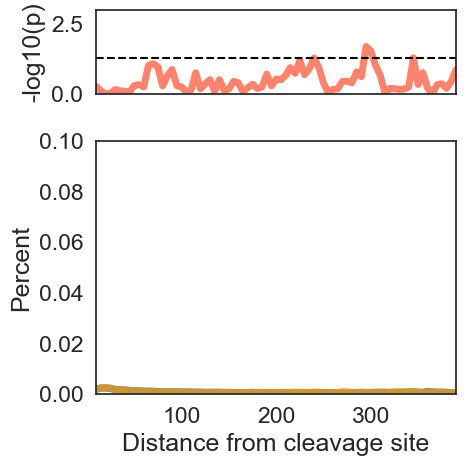

In [113]:
#Run t-test between percent nt ussage at each postion
stat_vals_5 = stats.ttest_ind(
                            [base_count_prox_u_h115_1_bins[1]/(base_count_prox_u_h115_1_bins[2] + base_count_prox_u_h115_1_bins[1]), base_count_prox_u_h115_2_bins[1]/(base_count_prox_u_h115_2_bins[2] + base_count_prox_u_h115_2_bins[1])],
                            [base_count_prox_u_h117_1_bins[1]/(base_count_prox_u_h117_1_bins[2] + base_count_prox_u_h117_1_bins[1]), base_count_prox_u_h117_2_bins[1]/(base_count_prox_u_h117_2_bins[2] + (base_count_prox_u_h117_2_bins[1]))])[-1]

#############################################################

#Figure for percent nt - 5' end A
#Generate plot
fig, (ax2, axs) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 3]}, figsize=(5, 5))

###############################################
#proximal
sns.lineplot(x = (base_count_prox_u_h112_1_bins[0] + base_count_prox_u_h112_2_bins[0])/2, 
             y=(base_count_prox_u_h112_1_bins[1]/(base_count_prox_u_h112_1_bins[2] + base_count_prox_u_h112_1_bins[1])) + 
               (base_count_prox_u_h112_2_bins[1]/(base_count_prox_u_h112_2_bins[2] + base_count_prox_u_h112_2_bins[1]))/2, 
                alpha=.6, color = 'darkgreen', ax = axs, linewidth = 5)


sns.lineplot(x = (base_count_prox_u_h113_1_bins[0] + base_count_prox_u_h113_2_bins[0])/2, 
             y=(base_count_prox_u_h113_1_bins[1]/(base_count_prox_u_h113_1_bins[2] + base_count_prox_u_h113_1_bins[1])) + 
               (base_count_prox_u_h113_2_bins[1]/(base_count_prox_u_h113_2_bins[2] + base_count_prox_u_h113_2_bins[1]))/2, 
                alpha=.6, color = 'tomato', ax = axs, linewidth = 5)

sns.lineplot(x = (base_count_prox_u_h115_1_bins[0] + base_count_prox_u_h115_2_bins[0])/2, 
             y=(base_count_prox_u_h115_1_bins[1]/(base_count_prox_u_h115_1_bins[2] + base_count_prox_u_h115_1_bins[1])) + 
               (base_count_prox_u_h115_2_bins[1]/(base_count_prox_u_h115_2_bins[2] + base_count_prox_u_h115_2_bins[1]))/2, 
                alpha=.6, color = 'steelblue', ax = axs, linewidth = 5)

sns.lineplot(x = (base_count_prox_u_h117_1_bins[0] + base_count_prox_u_h117_2_bins[0])/2, 
             y=(base_count_prox_u_h117_1_bins[1]/(base_count_prox_u_h117_1_bins[2] + base_count_prox_u_h117_1_bins[1])) + 
               (base_count_prox_u_h117_2_bins[1]/(base_count_prox_u_h117_2_bins[2] + base_count_prox_u_h117_2_bins[1]))/2, 
                alpha=.6, color = 'orange', ax = axs, linewidth = 5)


ax2 = sns.lineplot(x = (base_count_prox_u_h115_1_bins[0] + base_count_prox_u_h115_2_bins[0])/2, 
                   y = -np.log10(stat_vals_5), 
                   alpha=.8, color = 'tomato', ax = ax2, linewidth = 5)

ax2.set_ylabel("-log10(p)")
ax2.axhline(-np.log10(0.05), linestyle = '--', color = 'black')

axs.set_xlim(10, 390)
ax2.set_xlim(10, 390)
ax2.set(xticklabels=[])  # remove the tick labels
ax2.tick_params(bottom=False)  # remove the ticks

axs.set_ylim(0, 0.1)
ax2.set_ylim(0,3)

axs.set_ylabel("Percent")
axs.set_xlabel("Distance from cleavage site")


fig.tight_layout()

plt.show()

## Plot APA site usage

In [8]:
#path to data
path2 = "../../../Illumina_preprocess/results/"

In [9]:
#Define a function to calculate differences in PAS usage between conditions
def APA_differences(df, condition1, condition2):
    test_stat_list = []
    df_2 = pd.DataFrame(df)
    c1_df = df_2.filter(regex="PAU").filter(regex=condition1)
    c2_df = df_2.filter(regex="PAU").filter(regex=condition2)
    for idx, i in c1_df.iterrows():
        c1_values = i.values.tolist()
        c2_values = c2_df.iloc[idx].values.tolist()
        test_stat = stats.ttest_ind(c1_values, c2_values).pvalue
        test_stat_list.append(test_stat)
    df_2[condition1 + "_PAU_mean"] = df_2.filter(regex="PAU").filter(regex=condition1).mean(axis=1)
    df_2[condition2 + "_PAU_mean"] = df_2.filter(regex="PAU").filter(regex=condition2).mean(axis=1)
    df_2["log2FC"] = np.log2(df_2[condition2 + "_PAU_mean"]/df_2[condition1 + "_PAU_mean"])
    df_2["pvalue"] = test_stat_list
    df_2 = df_2.dropna()
    df_2["FDR"] = stats.false_discovery_control(list(df_2["pvalue"]))
    return(df_2)

In [11]:
#load in results DF and run the function to calculate differences in APA
data_df = pd.read_csv(path2 + "apa/pau_results.txt", sep = "\t")
df_results = APA_differences(data_df, "4SA", "4SD")

/Users/jacksongordon/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/Users/jacksongordon/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


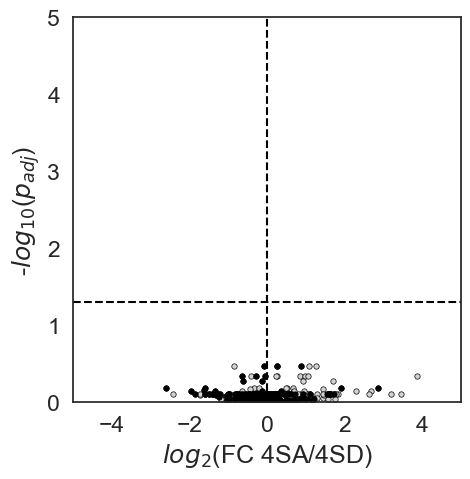

In [13]:
#Volcano plot to look at APA usage. More proximal or distal usage? 
f, ax = plt.subplots(1,1, figsize = (5,5))

sns.scatterplot(data = df_results, x = "log2FC", y = -np.log10(df_results["FDR"]), s = 15, alpha = 1, color = "lightgrey", edgecolor = "black", linewidth = 0.5)
sns.scatterplot(data = df_results.loc[df_results.APA_ID.str.contains("P")], x = "log2FC", y = -np.log10(df_results.loc[df_results.APA_ID.str.contains("P")]["FDR"]), color = "black", edgecolor = "black", linewidth = 0.5, s = 15)

# for i in np.unique(list(df_results.Gene_Name)):
#     sns.lineplot(data = df_results.loc[df_results.Gene_Name == i], x = "log2FC", y = -np.log10(df_results.loc[df_results.Gene_Name == i]["FDR"]), color = "black", linewidth = 1, alpha = 0.5)

ax.axhline(-np.log10(0.05), color = "black", linestyle = "--")
ax.axvline(0, color = "black", linestyle = "--")
ax.set_xlim(-5, 5)
ax.set_ylim(0,5)
ax.set_xlabel("$log_{2}$(FC 4SA/4SD)")
ax.set_ylabel("-$log_{10}$($p_{adj}$)")

plt.show()